## Some header here

Some text here

This notebook is written in **Python** so the default cell type is Python. However, you can use different languages by using the `%LANGUAGE` syntax. Python, Scala, SQL, and R are all supported.

#### We are going to go through some basic statistics we encounter/need when in the process of data exploration

#### 1. Normal Distribution (a.k.a. Gaussian distribution or bell curve)

This is the most common distribution (therefore considered the most important) we encounter when working with various types of data.
But what makes it so commonly used in the natural and social sciences (basically everywhere)? ND is used to represent real-valued random variables whose distributions are not known.

Why it works? How do you know that the distribution of all males per age around  the globe is normal?

Central limit theorem to the rescue - basically it states that under some conditions, the average of many samples (observations) of a random variable with finite mean and variance is itself a random variable whose distribution converges to a normal distribution as the number of samples increases. In other words if you have enough records of a random variable it's distribution is very similar to the normal distribution.

For example the height of people, the blood pressure, errors in measurements, IQ scores - all these very closely resemble the normal distribution.

Cool, isn't it?  

*** pic with IQ distribution

In [4]:
#Insert image here: 

#df = spark.read.format("image").load("https://www.quora.com/What-does-the-distribution-of-IQ-scores-look-like")

#https://www.quora.com/What-does-the-distribution-of-IQ-scores-look-like

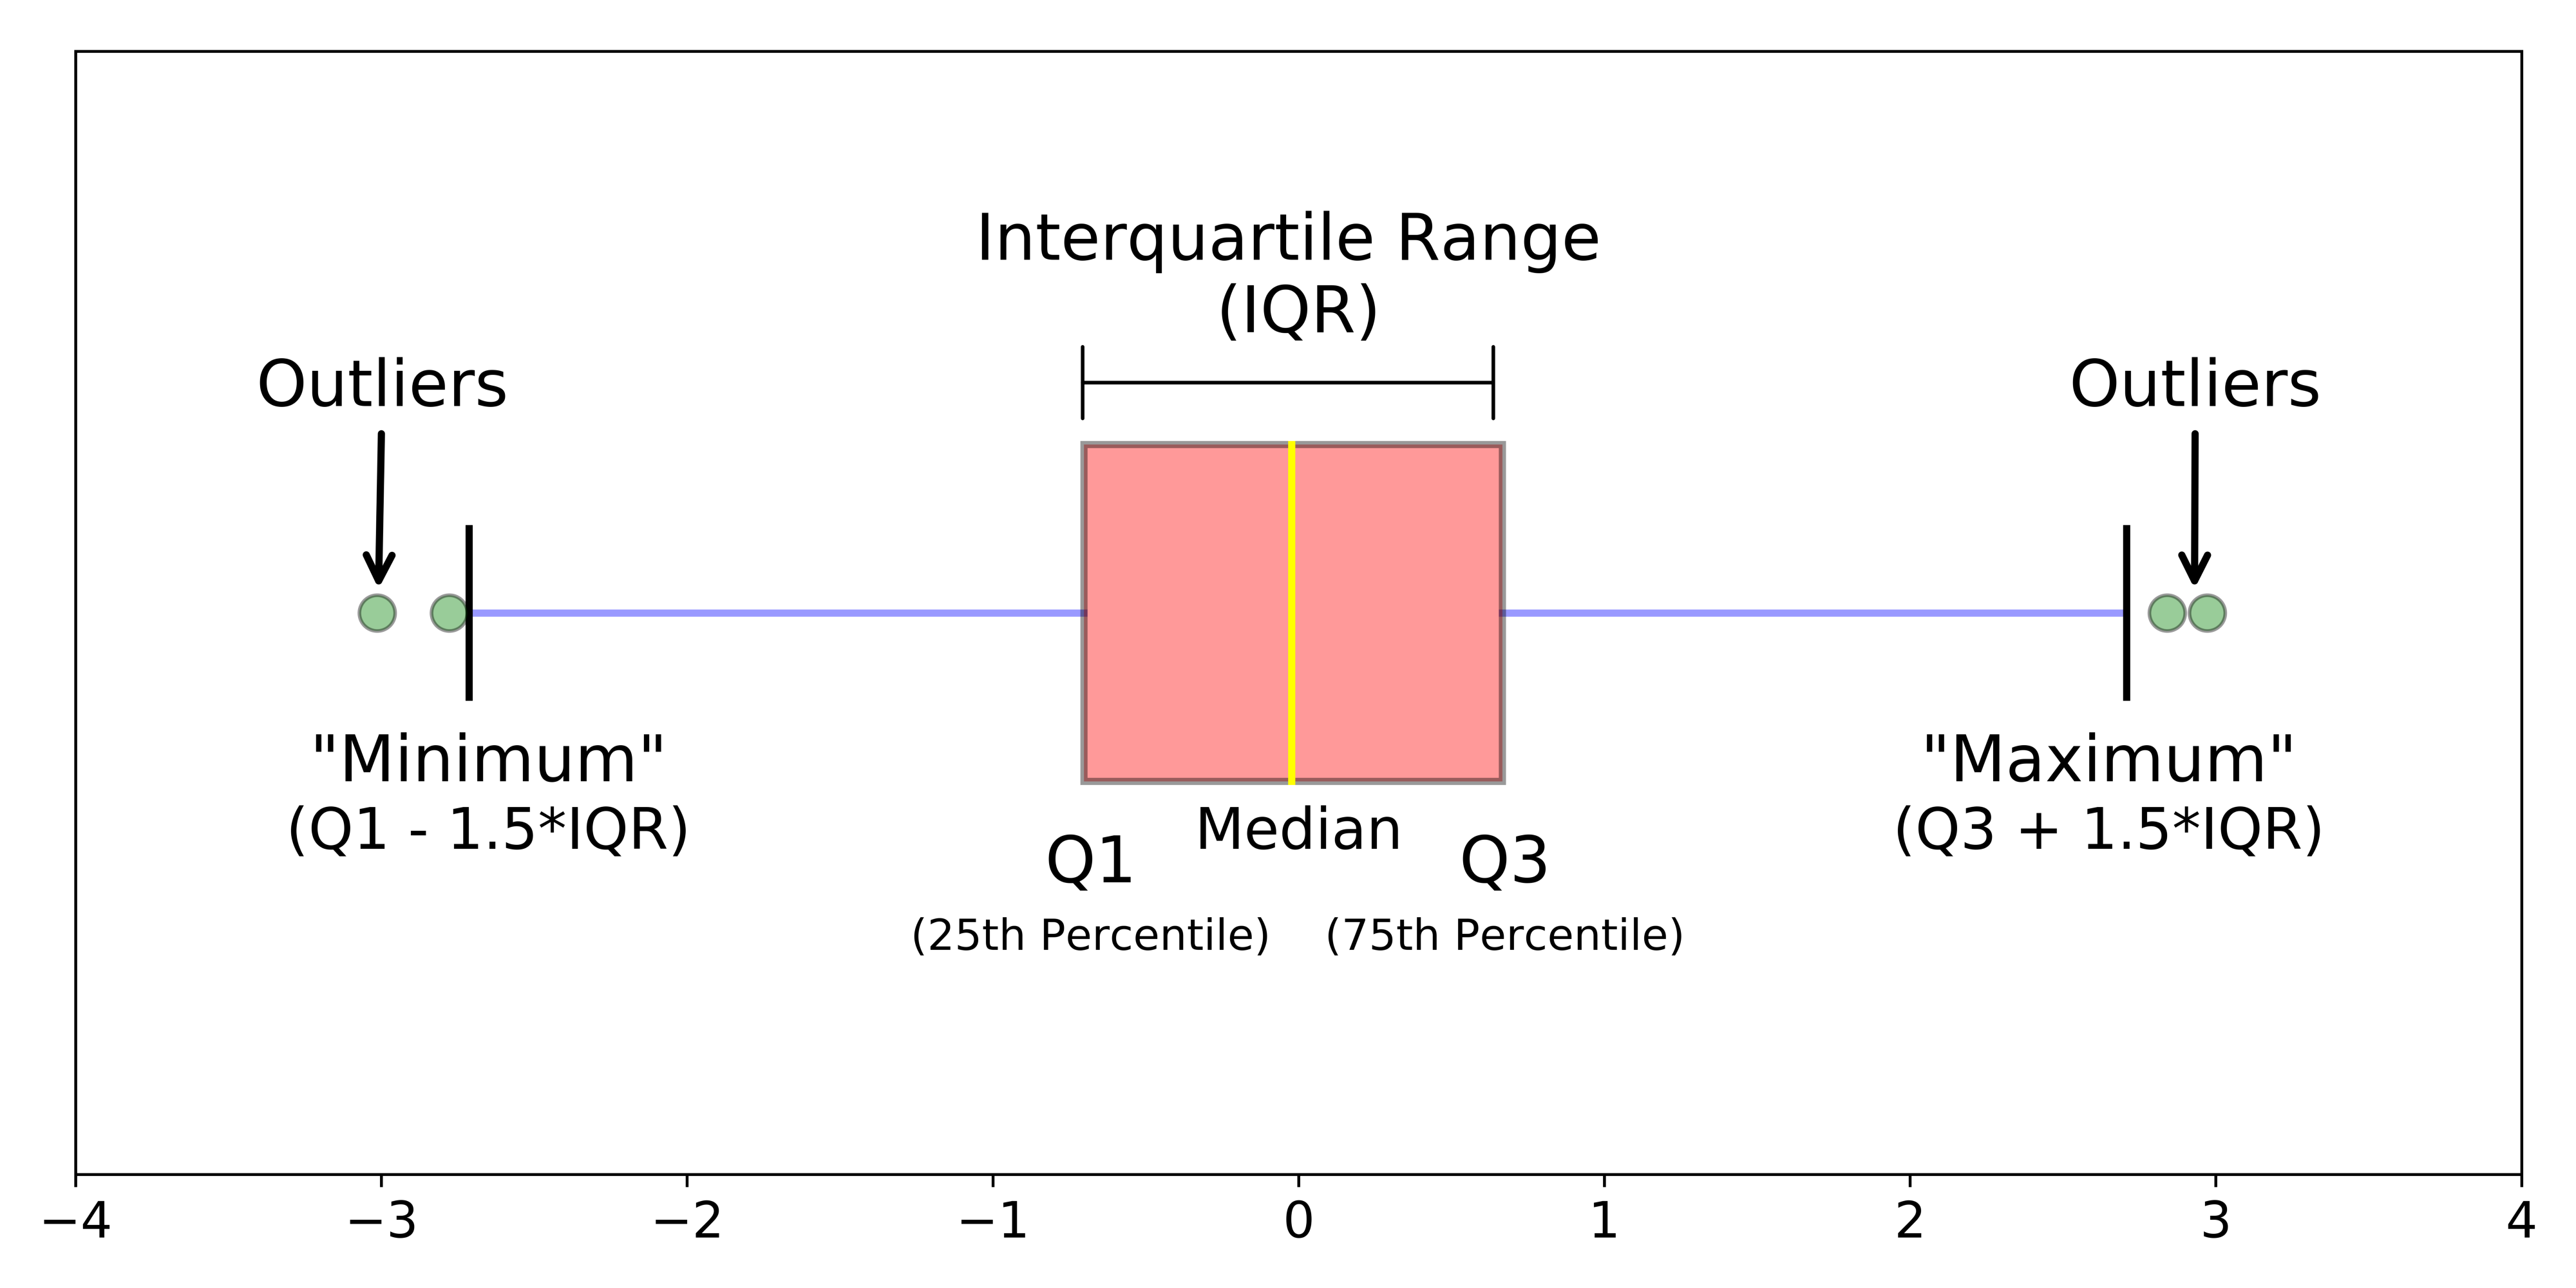

In [35]:
from IPython.display import Image
Image('C:/Users/m_b/Desktop/Blog/suicide-rates-overview-1985-to-2016/boxplot.png')

the general form of the probability density function of the normal distribution is:

$ P(x) = \frac{1}{{\sigma \sqrt {2\pi } }}e^{{{ - \left( {x - \mu } \right)^2 } \mathord{\left/ {\vphantom {{ - \left( {x - \mu } \right)^2 } {2\sigma ^2 }}} \right. \kern-\nulldelimiterspace} {2\sigma ^2 }}} $


If we display all possible values of our random variable (if we think about the IQ example those would be all the values between 60 and 180 roughly) the prob.dnesity finction would give us the relative likelyhood that our ranodom variable (IQ) equals any of the possible values. 

The two parameters here are $$\mu$$ and $$\sigma$$ where mu is the mean (and in this case also the median and the mode) - the probabilistic version of arithmetic mean and is a measure of central tendency of the distribution; the second parameter - sigma - is the standard deviation - a measure of the amount of variation or dispersion of a set of values. A low standard deviation indicates that the values tend to be close to the mean of the set, while a high standard deviation indicates that the values are spread out over a wider range.

If we square the standard devaition we get the variance of a distribution - how far our set is spread out from the average value (the mean value).

I mentioned some statistical features so let's define them as well:
- arithmetic mean (mathematical expectation, average) is the sum of values divided by the number of values
- median is the value separating the higher half from the lower half of a data sample in other words the value exactly in the middle of the set
- mode is the value that appears most often in a set

Knowing that let's take another look at the bell curve and see our statistical features in action:

We see the middle value (our mean) and we see how the deviation tells us how probable it is to be close to this middle value. We also see what percentage of the data is located in different places. The bright blue part of the plot shows that 68.2% of the data is located within one standard deviation away from the middle in each direction. Makes sense - it is most lakely our variable takes the mean value or close to it. As we get further away from the mean we get less and less data. If we look at the IQ chart again we see that the people with IQ higher that 140 are only 2% of the population a.k.a the probability that you are a genious (assuming you are a random person hehe) is only 2%! Sorry to break it to you like that, guys.

We just used another stats feature - percentile - the measure indicating the value below which a given percentage of observations in a group of observations falls.

There are many other distributions with lots of applications like the uniform distribution, the poisson distribution, etc. but we won't get into detail about them right now.

Now that we have revised some basic stats features we might want to visualize them. Boxplots are a great way to do that as they show the basics and gice you a quick overview of the distribution of your data.
There is a boxplot of normally distributed data:

![title](boxplot.png)

Let's go through the plot - the yellow line - the median- we are already familiar, the Qs are the percentiles: Q1- the 25th percentile, Q3- the 75th, meaning that the body of our boxplot represents 50% of the data;
We have min and max which is (almost) our lowest and highest values. 
The outliers - the extreme low or high values in our data oh and the purple lines are called whiskers.
The IQR (Interquartile range) is simply Q3 - Q1 and determines what will be the min/max values and the outliers.
Finally let's compare the boxplot to the density of normally distributed data:


Not all boxplots will look as pretty and symmetrical. Depending on the distribution of the data we might get something like this:

If the data is skewed some direction that means most records are close to the min/max. If the whiskers are long then the data is more spread out, if the median is close to the min/max then half the data is close to this value, if the "body" is tall then the data is more sparse, if the body is short then the data is more close etc.

Now that we have covered some basics around the distribution of our data, let's talk about the content.
Usually we work with tabular data with some attributes(columns) and the relations between them can give us valuable insights on how the process we observe works.
There is a metric for calculation the dependence between two variables - the correlation coeficient. Mathematically this is the covariance(the joint variability of two variables) devided by their standard deviations.
The correlations between all variables are usually displayed as a matrix. This gives and overview of all attributes and can help in selecting the most valuable features for some task.

this concludes our brief overview if some basic statistic concepts.

We have all seen these in school maths and most likely hated calculating them which reminds when one of the kids in my class was complaining about the stuff we learn saying "Miss, when are we going to use maths in real life?" and she looked him and replied "Well you certainly won't but some of the smart kids might!". Yeah, my teacher was pretty savage.

Now since we (obviously) are the smart kids let's see how these stats features help us in real life!

We will load one public data set that caught my eye, explore it and use some statistics to gain better understanding of the data.


![title](C:/Users/m_b/Desktop/Blog/suicide-rates-overview-1985-to-2016/boxplot.png)

In [73]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns

In [8]:
# File location and type
file_location = "C:/Users/m_b/Desktop/Blog/suicide-rates-overview-1985-to-2016/master.csv"
file_type = "csv"

df = pd.read_csv(file_location)
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


## Basic data exploration

Are there any features that are not relevent? Is our data of good quality? Is there missing data?

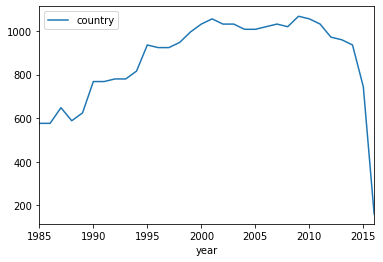

In [21]:
#display(df.select('year','country').distinct().groupBy('year').agg(count('country')).orderBy('year'))

df.groupby('year').agg({"country": "count"}).plot.line()

Based on the data we have we are going to get rid of the years with too few records

In [26]:
#df_new = df.filter(col('year').between('1995','2014'))

df_new = df.loc[(df['year'] >= 1995) & (df['year'] <= 2014)]

In [27]:
df_new.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
72,Albania,1995,male,25-34 years,13,232900,5.58,Albania1995,0.619,"2,424,499,009",835,Generation X
73,Albania,1995,male,55-74 years,9,178000,5.06,Albania1995,0.619,"2,424,499,009",835,Silent
74,Albania,1995,female,75+ years,2,40800,4.90,Albania1995,0.619,"2,424,499,009",835,G.I. Generation
75,Albania,1995,female,15-24 years,13,283500,4.59,Albania1995,0.619,"2,424,499,009",835,Generation X
76,Albania,1995,male,15-24 years,11,241200,4.56,Albania1995,0.619,"2,424,499,009",835,Generation X


In [28]:
df_new.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,19992.000000,19992.000000,1.999200e+04,19992.000000,7320.000000,19992.000000
mean,2004.578031,241.489096,1.820575e+06,12.839777,0.786282,18968.867347
std,5.672697,919.405021,3.936059e+06,19.231296,0.090211,20324.160757
min,1995.000000,0.000000,2.780000e+02,0.000000,0.513000,291.000000
25%,2000.000000,3.000000,9.733125e+04,0.920000,0.721000,4095.000000
50%,2005.000000,24.000000,4.295000e+05,5.770000,0.787000,11064.000000
75%,2009.000000,125.000000,1.455314e+06,16.430000,0.866000,28722.000000
max,2014.000000,21706.000000,4.380521e+07,224.970000,0.944000,126352.000000


Let's explore the gobal averages by country and year

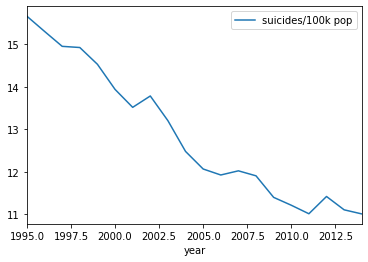

In [31]:
#display(df_new.select('year','suicides/100k pop').groupBy('year').agg(avg('suicides/100k pop')).orderBy('year'))

df_new.groupby('year').agg({"suicides/100k pop": "mean"}).plot.line()

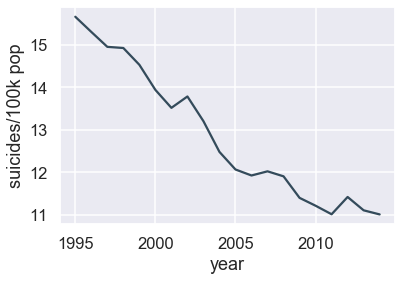

In [64]:
sns.set_style("darkgrid")
sns.set_palette('Blues_d')

data = df_new.groupby('year').agg({"suicides/100k pop": "mean"})
data['year'] = data.index

x = data['year']
y = data["suicides/100k pop"]

ax = sns.lineplot(x, y, data=data)

We can clearly see that globaly there is a tendency of lowering the rates per 100k pop!

Text(0, 0.5, 'Country')

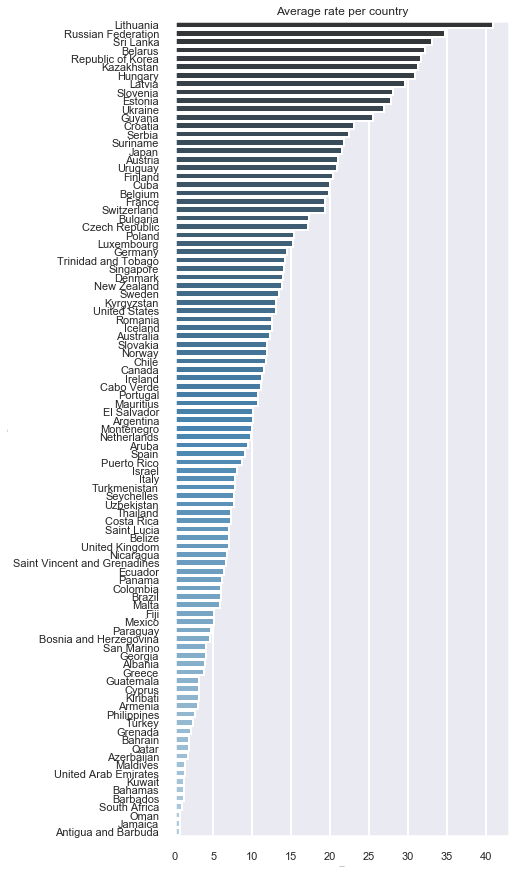

In [86]:
#display(df_new.select('country','suicides/100k pop').groupBy('country').agg(avg('suicides/100k pop')).orderBy('country'))
data = df_new.groupby('country').agg({"suicides/100k pop": "mean"}).sort_values("suicides/100k pop", ascending=False)
data['country'] = data.index


#Set context, increase font size
sns.set_context("poster", font_scale=0.5)

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

sns.barplot(x='suicides/100k pop', y='country', data=data, palette="Blues_d")
#set paramters
ax.set(title= "Average rate per country")
ax.set_xlabel('Average rate', fontsize = 1)
ax.set_ylabel('Country', fontsize = 0.4)


In [19]:
display(df_new.select('age','suicides/100k pop').groupBy('age').agg(avg('suicides/100k pop')).orderBy('age'))

age,avg(suicides/100k pop)
15-24 years,8.99929171668668
25-34 years,12.33504501800722
35-54 years,15.32968787515006
5-14 years,0.6364825930372141
55-74 years,16.260357142857124
75+ years,23.47780012004808


Globally half the suicides are commited by people above 55 years old

In [21]:
dfiso = ks.read_excel("/dbfs/FileStore/tables/ISO_Alpha3_Codes.xlsx") ## if you don't have dbfs/.. in the path read_excel does not find the file!!! Fun stuff

dfISO = dfiso.to_spark()

# try to display some map here

In [22]:
display(dfISO)

UN Trade Statistics,Abbreviation,Country
ABW Aruba,ABW,Aruba
AFG Afghanistan,AFG,Afghanistan
AGO Angola,AGO,Angola
AIA Anguilla,AIA,Anguilla
ALA Åland Islands,ALA,Åland Islands
ALB Albania,ALB,Albania
AND Andorra,AND,Andorra
ANT Netherlands Antilles,ANT,Netherlands Antilles
ARE United Arab Emirates,ARE,United Arab Emirates
ARG Argentina,ARG,Argentina


In [23]:
df_to_map = df_new.alias('t1').join(dfISO.alias('t2'), lower(col('t1.country')) == lower(col('t2.Country')), 'left')

In [24]:
display(df_to_map.select('t1.country').distinct().filter(col('Abbreviation').isNull() == True))

country
Cabo Verde
Republic of Korea
Saint Vincent and Grenadines


In [25]:
display(df_new.select('country').distinct().filter(col('Country').like('%Korea%')))

country
Republic of Korea


The issue we encounter is that in the dataset we have only one Republic of Korea, now since we only need this to be able to visualise the countries on the map let's say it is PRK

In [27]:
display(dfISO.filter(col('Country').like('%Grenadines%')))

UN Trade Statistics,Abbreviation,Country
VCT Saint Vincent and the Grenadines,VCT,Saint Vincent and the Grenadines


In [28]:
df_to_map =(df_to_map.withColumn('Abbreviation', when(col('t1.country') == 'Republic of Korea', 'PRK')
                                                .when(col('t1.country') == 'Cabo Verde', 'CPV')
                                                .when(col('t1.country') == 'Saint Vincent and Grenadines', 'VCT')
                                                .otherwise(col('Abbreviation'))))

In [29]:
display(df_to_map.select('t1.country').distinct().filter(col('Abbreviation').isNull() == True))

country


#### Cool no more missing abbrevaitions, no we are ready to use map

In [31]:
display(df_to_map.select('Abbreviation','suicides/100k pop').groupBy('Abbreviation').agg(avg('suicides/100k pop')).orderBy('Abbreviation'))

Abbreviation,avg(suicides/100k pop)
ABW,9.503095238095236
ALB,3.8766145833333336
ARE,1.3179166666666662
ARG,10.112999999999996
ARM,2.984907407407407
ATG,0.68375
AUS,12.289210526315786
AUT,21.026499999999977
AZE,1.674696969696969
BEL,19.80341666666667


In [32]:
kdf = ks.DataFrame(df_to_map.select('t1.*', 'Abbreviation'))

In [33]:
kdf.describe() ## compare to the more vanilla describe() method of pyspark

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,19992.000000,19992.000000,1.999200e+04,19992.000000,7320.000000,19992.000000
mean,2004.578031,241.489096,1.820575e+06,12.839777,0.786282,18968.867347
std,5.672697,919.405021,3.936059e+06,19.231296,0.090211,20324.160757
min,1995.000000,0.000000,2.780000e+02,0.000000,0.513000,291.000000
25%,2000.000000,3.000000,9.729900e+04,0.920000,0.721000,4095.000000
50%,2005.000000,24.000000,4.295000e+05,5.770000,0.786000,11062.000000
75%,2009.000000,125.000000,1.455000e+06,16.430000,0.866000,28722.000000
max,2014.000000,21706.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [34]:
kdf.isnull().sum()

Out[24]: country 0
year 0
sex 0
age 0
suicides_no 0
population 0
suicides/100k pop 0
country-year 0
HDI for year 12672
 gdp_for_year ($) 0
gdp_per_capita ($) 0
generation\r 0
Abbreviation 0
dtype: int64

In [35]:
kdf.fillna(0)
kdf.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,Abbreviation
0,Aruba,1995,male,75+ years,2,889,224.97,Aruba1995,NaN,"1,320,670,391",17949,G.I. Generation\r,ABW
1,Aruba,1995,male,25-34 years,4,7520,53.19,Aruba1995,NaN,"1,320,670,391",17949,Generation X\r,ABW
2,Aruba,1995,male,55-74 years,1,4558,21.94,Aruba1995,NaN,"1,320,670,391",17949,Silent\r,ABW
3,Aruba,1995,male,35-54 years,1,11895,8.41,Aruba1995,NaN,"1,320,670,391",17949,Boomers\r,ABW
4,Aruba,1995,female,15-24 years,0,5138,0.00,Aruba1995,NaN,"1,320,670,391",17949,Generation X\r,ABW


In [36]:
import seaborn as sns
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

dist = kdf['population'].loc[kdf['suicides/100k pop'] == 1].values
sns.distplot(dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('title', fontsize=14)

# v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
# sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
# ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

--------------------------------------------------------------------------- 
 PandasNotImplementedError Traceback (most recent call last)
 <command-2917089042630018> in <module> 
 4 f , ( ax1 , ax2 , ax3 ) = plt . subplots ( 1 , 3 , figsize = ( 20 , 6 ) ) 
 5 
 ----> 6 dist = kdf [ 'population' ] . loc [ kdf [ 'suicides/100k pop' ] == 1 ] . values
 7 sns . distplot ( dist , ax = ax1 , fit = norm , color = '#FB8861' ) 
 8 ax1 . set_title ( 'title' , fontsize = 14 ) 

 /databricks/python/lib/python3.7/site-packages/databricks/koalas/usage_logging/__init__.py in wrapper (*args, **kwargs) 
 138 start = time . perf_counter ( ) 
 139 try : 
 --> 140 res = func ( * args , ** kwargs ) 
 141 logger.log_success(
 142 class_name, function_name, time.perf_counter() - start, signature)

 /databricks/python/lib/python3.7/site-packages/databricks/koalas/series.py in __getattr__ (self, item) 
 4271 property_or_func = getattr ( _MissingPandasLikeSeries , item ) 
 4272 if isinstance ( property_or_func , property ) : 
 -> 4273 return property_or_func . fget ( self ) # type: ignore 
 4274 else : 
 4275 return partial ( property_or_func , self ) 

 /databricks/python/lib/python3.7/site-packages/databricks/koalas/usage_logging/__init__.py in wrapper (self) 
 208 def wrapper ( self ) : 
 209 try : 
 --> 210 return prop . fget ( self ) 
 211 finally : 
 212 logger . log_missing ( class_name , property_name , is_deprecated ) 

 /databricks/python/lib/python3.7/site-packages/databricks/koalas/missing/__init__.py in unsupported_property (self) 
 36 def unsupported_property ( self ) : 
 37 raise PandasNotImplementedError(class_name=class_name, property_name=property_name,
 ---> 38 reason=reason)
 39 
 40 @ property

 PandasNotImplementedError : The property `pd.Series.values()` is not implemented. If you want to collect your data as an NumPy array, use 'to_numpy()' instead.

## Basic statistical features

When you are exploring data it is common to look for patterns that can help you derive some insights : what is the most important feature of my data that impact my sales, what features to leave if i want to predict my sales values? And so on...

Here is when the basic statistics come in hand. 

Let's go through some commonly used stat methods and apply them to our dataset

###### 1. Correlations

We can easily display correlations between variables (features of our dataset) using the correlation matrix which is nothing different that a table showing the correlation coefficients between the variables.

The correlation coefficient itself is represented by the formula:

#### Mean - arithmetic mean, also called the mathematical expectation or average, is the central value of a discrete set of numbers: specifically, the sum of the values divided by the number of values

Let's see the mean s.rate per country, rate and age

In [42]:
df.describe().show()

# stdev tell how measurements for a group are spread out from the average (mean), or expected value. A low standard deviation means that most of the numbers are close to the average. A high standard deviation means that the numbers are more spread out.it is the square root of the Variance.

# The variance is the average of the squared differences from the Mean.

In [43]:
import matplotlib.pyplot as plt

f, axes = plt.subplots(ncols=5, figsize=(20,4))
colors = ["#0101DF", "#DF0101"]

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="sex", y="suicides/100k pop", data=kdf, palette=colors, ax=axes[0])
axes[0].set_title('Some title')

In [44]:
ax = kdf[''].plot.box()

In [45]:
df = spark.read.format("image").load("")

#### What are boxplots?

- way of displaying the distribution of data

#### Characteristics of a boxplot

- median (Q2/50th Percentile): the middle value of the dataset.
- first quartile (Q1/25th Percentile): the middle number between the smallest number (not the “minimum”) and the median of the dataset
- third quartile (Q3/75th Percentile): the middle value between the median and the highest value (not the “maximum”) of the dataset.
- interquartile range (IQR): 25th to the 75th percentile.
- whiskers 
- outliers
- “maximum”: Q3 + 1.5*IQR
- “minimum”: Q1 -1.5*IQR

#### Boxplot on a Normal Distribution - for better understanding

insert some picture once you figure out how

What's the big deal with normal distribution?

A PDF(probability density function) is used to specify the probability of the random variable falling within a particular range of values, as opposed to taking on any one value